In [4]:
import os
import numpy as np
import glob
import csv
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats, optimize
from pandas import DataFrame, Series
import seaborn as sns
import random as rd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats
import random

In [5]:
%matplotlib inline

In [14]:
##td code for serial condition
ntrials = 30
nsteps = 30
w = np.zeros((nsteps,2))
V = np.zeros((ntrials,nsteps))
r = np.zeros((ntrials,nsteps))
delta = np.zeros((ntrials,nsteps))


gamma = 1
alpha = .25

a_time = 10 #time at which stimulus A occurs
b_time = 20 #time at which stimulus B occurs
reward_time = 25 #time at which reward occurs

for trial in range(0,ntrials):
    for step in range(0,nsteps):
        x = np.zeros((nsteps,2))
        if step >= a_time:
            x[step - a_time,0] = 1
        if step >= b_time:
            x[step - b_time,1] = 1
        r[trial,step] = (step == reward_time)
        
        V[trial,step] = np.trace(np.dot(w.T,x))

        if step > 0:
            delta[trial,step - 1] = r[trial,step - 1] + gamma * V[trial,step] - V[trial,step-1]
            dw = alpha * delta[trial,step-1] * xlast
            w += dw
        
        xlast = x


In [19]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(0,30,1)
Y = np.arange(0,ntrials,1)
X, Y = np.meshgrid(X, Y)
pe = np.array([delta[x,y] for x,y in zip(np.ravel(X), np.ravel(Y))])
v = np.array([V[x,y] for x,y in zip(np.ravel(X), np.ravel(Y))])
# Z = pe.reshape(X.shape)
Z = v.reshape(X.shape)
plt.xlabel('time steps')
plt.ylabel('trials')

ax.set_xlabel('time steps')
ax.set_ylabel('trials')
ax.set_zlabel('PE')

surf = ax.plot_surface(X, Y, delta, rstride=1, cstride=1, cmap=cm.coolwarm,
         linewidth=0, antialiased=False)
#surf = ax.plot_trisurf(ntrials, nsteps, delta)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=.5, aspect=5)

plt.show()

ValueError: shape mismatch: two or more arrays have incompatible dimensions on axis 1.

In [43]:
##td code for serial condition with unrewarded B
num_iters = 1000
ntrials = 100
nsteps = 30
delta = np.zeros((ntrials,nsteps,num_iters))
V = np.zeros((ntrials,nsteps,num_iters))

gamma = 1
alpha = .6

a_time = 10 #time at which stimulus A occurs
b_time = 20 #time at which stimulus B occurs
reward_time = 25 #time at which reward occurs

for iteration in range(0,num_iters):
    w = np.zeros((nsteps,2))
    r = np.zeros((ntrials,nsteps))

    for trial in range(0,ntrials):
        ser_trial = np.random.choice([True, False])
        for step in range(0,nsteps):
            x = np.zeros((nsteps,2))
            if step >= b_time:
                x[step - b_time,1] = 1 
                
            if ser_trial: #A -> B+
                if step >= a_time:
                    x[step - a_time,0] = 1
                r[trial,step] = (step == reward_time)                

            V[trial,step,iteration] = np.trace(np.dot(w.T,x))

            if step > 0:
                delta[trial,step - 1,iteration] = r[trial,step - 1] + gamma * V[trial,step,iteration] - V[trial,step-1,iteration]
                dw = alpha * delta[trial,step-1,iteration] * xlast
                w += dw

            xlast = x
delta = np.mean(delta, axis = 2)
V = np.mean(V, axis = 2)

In [49]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

def fun(x, y):
        return V[x,y]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = list(xrange(0,ntrials))
y = list(xrange(0,nsteps))
test = [[a for a in range(0, len(y))] for b in range(0, len(x))]
X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z,rstride=1, cstride=1, cmap=cm.coolwarm,
         linewidth=0, antialiased=False)

ax.set_xlabel('Trials')
ax.set_ylabel('Steps')
ax.set_zlabel('V')
#fig.colorbar(surf, shrink=.5, aspect=5)

plt.show()

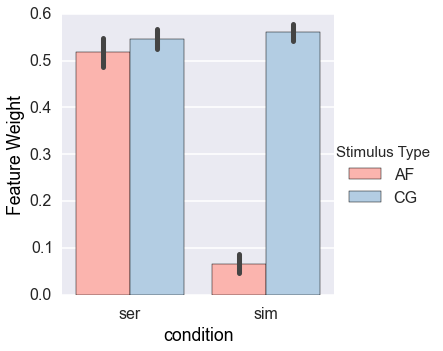

In [17]:
#load data from MDP model and plot it
c_go_sim_fn = '/Users/ianballard/Dropbox/fd/c_go_sim_fn.txt'
c_dont_sim_fn = '/Users/ianballard/Dropbox/fd/c_dont_sim_fn.txt'
c_go_sim_fp = '/Users/ianballard/Dropbox/fd/c_go_sim_fp.txt'
c_dont_sim_fp = '/Users/ianballard/Dropbox/fd/c_dont_sim_fp.txt'
c_go_ser_fp = '/Users/ianballard/Dropbox/fd/c_go_ser_fp.txt'
c_dont_ser_fp = '/Users/ianballard/Dropbox/fd/c_dont_ser_fp.txt'
c_go_ser_fn = '/Users/ianballard/Dropbox/fd/c_go_ser_fn.txt'
c_dont_ser_fn = '/Users/ianballard/Dropbox/fd/c_dont_ser_fn.txt'

c_go_sim_fn = np.loadtxt(c_go_sim_fn)
c_dont_sim_fn = np.loadtxt(c_dont_sim_fn)
c_go_sim_fp = np.loadtxt(c_go_sim_fp)
c_dont_sim_fp = np.loadtxt(c_dont_sim_fp)
c_go_ser_fp = np.loadtxt(c_go_ser_fp)
c_dont_ser_fp = np.loadtxt(c_dont_ser_fp)
c_go_ser_fn = np.loadtxt(c_go_ser_fn)
c_dont_ser_fn = np.loadtxt(c_dont_ser_fn)

num_iters = len(c_dont_ser_fn)
Weight = np.hstack(((c_go_ser_fp - c_dont_ser_fp).ravel(), (c_go_ser_fn - c_dont_ser_fn).ravel(), 
                    ( c_go_sim_fp -  c_dont_sim_fp).ravel() ,(c_go_sim_fn -  c_dont_sim_fn).ravel()))
stim_type = ['AF']*num_iters + ['CG']*num_iters + ['AF'] *num_iters + ['CG'] * num_iters
cond = ['ser']*num_iters + ['ser']*num_iters + ['sim'] *num_iters + ['sim'] * num_iters

d = {'Feature Weight': Weight , 'condition': cond, 'Stimulus Type': stim_type}
d = DataFrame(d)

data_dir = '/Users/ianballard/Dropbox/fd/'
sns.set(context='poster')
sns.despine()
# results = {'ser_fp': c_go_ser_fp - c_dont_ser_fp, 'ser_fn': c_go_ser_fn - c_dont_ser_fn,
#            'sim_fp':  c_go_sim_fp -  c_dont_sim_fp ,'sim_fn': c_go_sim_fn -  c_dont_sim_fn}
# results = pd.DataFrame(results)
sns.factorplot('condition','Feature Weight','Stimulus Type', data=d,kind='bar',palette="Pastel1",ci=68);
plt.savefig(data_dir + 'fd_simulated.tiff', dpi=600,orientation='landscape')
